<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/ProyectoFinal/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final

---


#Machine Learning

#### Juan Leonel Santamaria Mena

---
## Identificación de Lenguaje de Señas usando Redes Neuronales



---


#abstrad
 En este notebook se presenta el Proyecto Final correspondiente al curso de Machine Learning del Ago-Dic 2023, esté se presentan las herramientas adquiridas en el presente curso con la finalidad de desarrollar una red neuronal capas de identificar las diferentes letra del lenguaje de señas.

#Justificación

El lenguaje de señas es una forma crucial de comunicación para la comunidad sorda, pero a menudo se enfrenta a barreras cuando se interactúa con personas que no comprenden este sistema. Implementar una red neuronal para reconocer y comprender el lenguaje de señas puede tener un impacto positivo en la vida diaria de las personas sordas, permitiéndoles una comunicación más fluida y efectiva con aquellos que no conocen este idioma visual.

La tecnología de reconocimiento de lenguaje de señas basada en redes neuronales puede superar las limitaciones de la comunicación tradicional, proporcionando una herramienta que traduce de manera precisa los gestos y movimientos específicos del lenguaje de señas a un formato comprensible para aquellos que no lo conocen. Esto no solo facilita la comunicación interactiva, sino que también promueve la inclusión social y profesional de las personas con discapacidad auditiva al eliminar las barreras lingüísticas.


Marco Teorico

* Alto Sesgo (High Bias):
  * Características:
    * El modelo es demasiado simple y no puede capturar la complejidad de los datos de entrenamiento.
    * Tiende a hacer suposiciones fuertes y simplificadoras sobre la relación entre las variables.
  * Impacto:
    * El modelo tendrá un rendimiento deficiente tanto en los datos de entrenamiento como en los datos de prueba.
    * Subestima la verdadera relación subyacente en los datos.

  
* Baja Varianza (Low Variance):
  * Características:
    * El modelo es robusto y no es muy sensible a pequeñas variaciones en los datos de entrenamiento.
    * Generaliza bien a nuevos datos.
  * Impacto:
    * El rendimiento en los datos de entrenamiento y prueba es consistente.
    * Aunque puede tener un buen rendimiento en datos bien conocidos, puede no capturar patrones más complejos.

* Bajo Sesgo (Low Bias):
  * Características:
    * El modelo es más complejo y puede capturar patrones más sutiles en los datos.
    * No hace suposiciones fuertes y simplificadoras.
  * Impacto:
    * Puede tener un buen rendimiento en los datos de entrenamiento y capturar patrones complejos.
    * Sin embargo, puede ser sensible a ruido y variaciones en los datos, lo que puede llevar a un rendimiento deficiente en datos no vistos.
* Alta Varianza (High Variance):
  * Características:
    * El modelo es muy sensible a las fluctuaciones en los datos de entrenamiento.
    * Puede ajustarse demasiado a los datos específicos de entrenamiento.
  * Impacto:
    * Puede tener un rendimiento excelente en los datos de entrenamiento, pero puede generalizar mal a nuevos datos.
    * Es propenso a sobreajuste (overfitting).


Trade-off:
Existe un trade-off entre sesgo y varianza. En general, se busca un equilibrio que minimice el error total del modelo. Un modelo con sesgo y varianza moderados suele ser preferible para lograr una buena generalización a nuevos datos. Este equilibrio se conoce como el "punto óptimo" en el dilema sesgo-varianza. En la práctica, encontrar este punto óptimo puede requerir ajustes en la complejidad del modelo y la cantidad de datos de entrenamiento.

# Visualizacion de Imagenes

## Librerias

In [2]:
# librerias
import sys
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Convolution2D,MaxPooling2D,BatchNormalization,MaxPool2D

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy import ndimage
import pandas as pd

import glob
%matplotlib inline
#acceso a drive
from google.colab import drive
drive.mount('/content/drive')

#numero de pixceles
num_px=28

Mounted at /content/drive


## Conjuntos

In [42]:
#Conjunto de entrenamiento
train_name = np.array([])
train_labels = np.array([])
train_img=[]
files = glob.glob('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train*')
etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train/_annotations.csv')
train_name = np.append(train_name,np.array(etiquetas['filename']))
train_labels = np.append(train_labels,np.array( etiquetas['class']))
for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train/{i}')
    img = img.convert('L')
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_img.append(data.astype(np.float32))

train_img=np.array(train_img, dtype=np.uint8)

In [41]:
# Conjunto de prueba
test_name = np.array([])
test_labels = np.array([])
test_img=[]
files = glob.glob('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test*')
etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/_annotations.csv')
test_name = np.append(test_name,np.array(etiquetas['filename']))
test_labels = np.append(test_labels,np.array( etiquetas['class']))
for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/{i}')
    img = img.convert('L')
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_img.append(data.astype(np.float32))

test_img=np.array(test_img, dtype=np.uint8)

In [21]:
# Conjunto de Validación
valid_name = np.array([])
valid_labels = np.array([])
valid_img=[]
files = glob.glob('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid*')
etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid/_annotations.csv')
valid_name = np.append(valid_name,np.array(etiquetas['filename']))
valid_labels = np.append(valid_labels,np.array( etiquetas['class']))
for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid/{i}')
    img = img.convert('L')
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    valid_img.append(data.astype(np.float32))

valid_img=np.array(valid_img, dtype=np.uint8)

## Imagenes

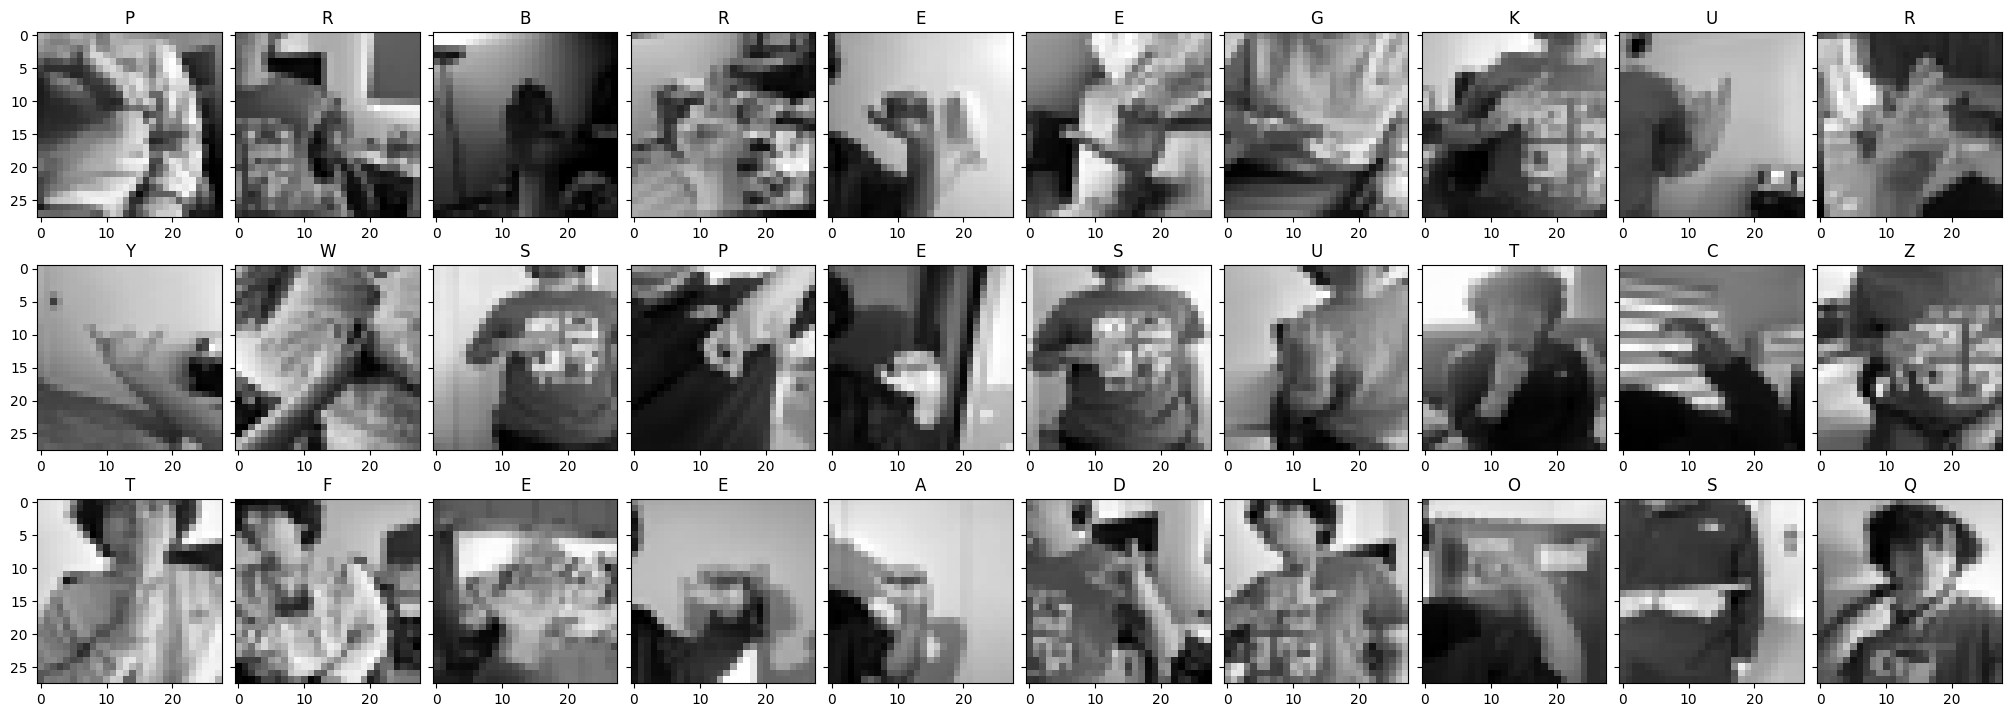

In [73]:
nrows_ = 3
ncols_ = 10
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(20, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.imshow(valid_img[i],cmap='gray')
  ax.set_title(valid_labels[i])

# Pre procesamiento

### separacion de datos

Para el Preprocesamiento se separa las imagenes en las diferentes clases

### Cargar los datos

In [15]:
#pasamos donde se encuentran los dataset de cada conjunto
data_entrenamiento='/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train/data'
data_prueba='/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/data'
data_validacion='/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid/data'

In [16]:
generador_entrenamiento = ImageDataGenerator(rescale=1./255,
                                             shear_range=0.3,
                                             zoom_range=0.3,
                                             horizontal_flip=True)
#Normalizacion de los datos
generador_prueba = ImageDataGenerator(rescale=1./255)

conjunto_entrenamiento = generador_entrenamiento.flow_from_directory(data_entrenamiento,
                                                                     target_size=(28, 28),
                                                                     batch_size=32,
                                                                     class_mode='categorical')

conjunto_prueba = generador_prueba.flow_from_directory(data_prueba,
                                                       target_size=(28, 28),
                                                       batch_size=32,
                                                       class_mode='categorical')

conjunto_validacion = generador_entrenamiento.flow_from_directory(data_entrenamiento,
                                                                     target_size=(28, 28),
                                                                     batch_size=32,
                                                                     class_mode='categorical')

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 2304 images belonging to 26 classes.


In [5]:
#Clases a identificar
indices=conjunto_entrenamiento.class_indices
print(indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


#Primera aproximación

In [74]:
#
model = Sequential([
    Dense(units=2, input_shape=(num_px,num_px, 3), activation='relu'),
    Flatten(),
    Dense(units=10, activation='relu'),
    Dense(units=26, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

historial= model.fit(conjunto_entrenamiento,epochs=10,validation_data=conjunto_prueba)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64, 64, 2)         8         
                                                                 
 flatten_11 (Flatten)        (None, 8192)              0         
                                                                 
 dense_25 (Dense)            (None, 10)                81930     
                                                                 
 dense_26 (Dense)            (None, 26)                286       
                                                                 
Total params: 82224 (321.19 KB)
Trainable params: 82224 (321.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
72/72 [==============================] - 18s 244ms/step - loss: 3.2546 - accuracy: 0.0725 - val_loss: 3.2466 - val_accuracy: 0.0614
Epoc

In [72]:
def graficar_accuaracy_loss(historial):
  fig , ax = plt.subplots(1,2)
  fig.set_size_inches(16,3)

  epoch= np.linspace(1,len(historial.history['accuracy']),len(historial.history['accuracy']))

  ax[0].plot(epoch,historial.history['accuracy'],'go-',label='accuracy')
  ax[0].plot(epoch,historial.history['val_accuracy'],'ro-',label='val_accuracy')
  ax[0].set_title('accuracy')
  ax[0].grid()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")
  ax[0].legend()

  ax[1].plot(epoch,historial.history['loss'],'go-',label='loss')
  ax[1].plot(epoch,historial.history['val_loss'],'ro-',label='val_loss')
  ax[1].set_title('loss')
  ax[1].grid()
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

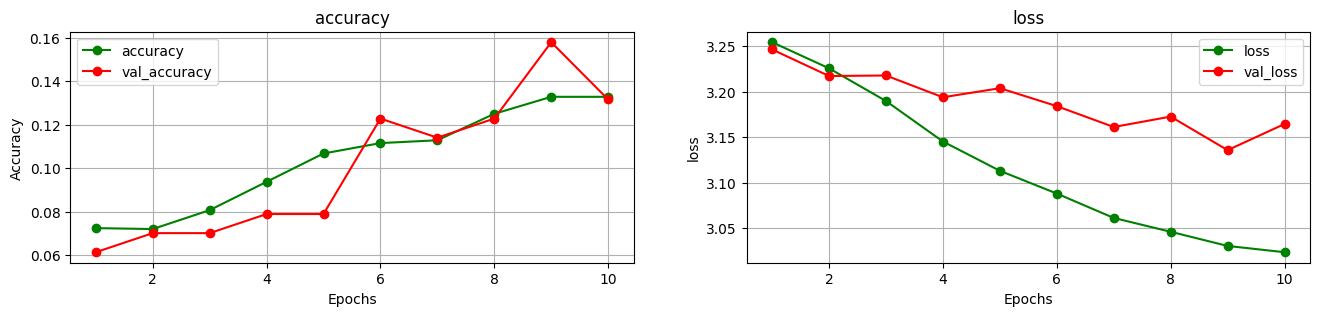

In [75]:
graficar_accuaracy_loss(historial)

In [76]:
model.evaluate(conjunto_validacion)

7/7 [==============================] - 1s 155ms/step - loss: 3.1194 - accuracy: 0.1216


[3.1193718910217285, 0.12162162363529205]

Como se puede observar demasiado inexacto esto es natural por ser la primera aproximacion

## modificaciones


bias vs varianza

* **Bajo BIAS**: Sugiere menos supocisiones sobre la forma de la funcion objetivo
* **Alto BIAS**: Sugiere mas supocisiones sobre la forma de la funcion objetivo

se refiere a la alta calidad


In [77]:
#resolucion de las imagenes en pixceles
num_px=64
#Cambiamos las dimensiones de los conjuntos
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory( data_entrenamiento, target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_prueba = generador_prueba.flow_from_directory(               data_prueba,        target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_validacion = generador_entrenamiento.flow_from_directory(    data_validacion,    target_size=(num_px, num_px),batch_size=32,class_mode='categorical')

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 222 images belonging to 26 classes.


In [78]:
model = Sequential([
    Dense(units=2, input_shape=(num_px,num_px, 3), activation='relu'),
    Flatten(),
    Dense(units=10, activation='relu'),
    Dense(units=26, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

historial= model.fit(conjunto_entrenamiento,epochs=10,validation_data=conjunto_prueba)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64, 64, 2)         8         
                                                                 
 flatten_12 (Flatten)        (None, 8192)              0         
                                                                 
 dense_28 (Dense)            (None, 10)                81930     
                                                                 
 dense_29 (Dense)            (None, 26)                286       
                                                                 
Total params: 82224 (321.19 KB)
Trainable params: 82224 (321.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
72/72 [==============================] - 15s 197ms/step - loss: 3.2610 - accuracy: 0.0599 - val_loss: 3.2463 - val_accuracy: 0.0439
Epoc

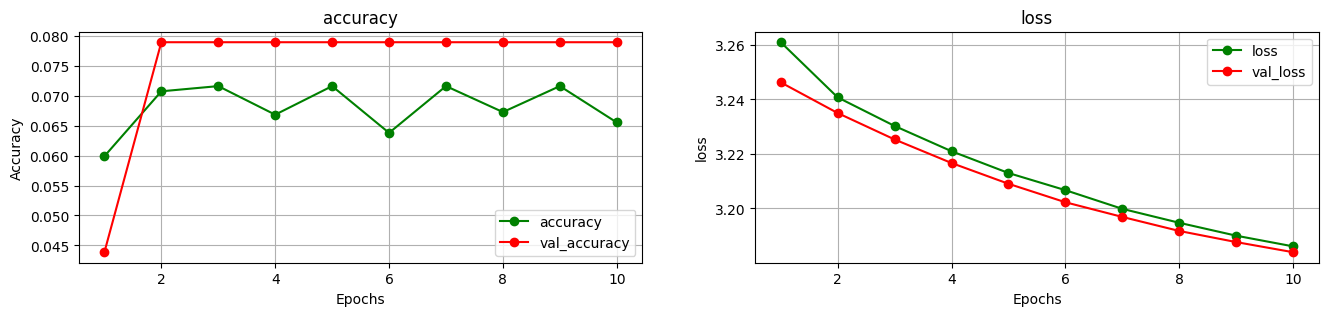

In [79]:
graficar_accuaracy_loss(historial)

observamos que el valor de loss se mantiene en tendencia adisminuir

# Primera aquitectura


In [80]:
model1 = Sequential([
    Convolution2D(16, (3, 3), input_shape=(num_px, num_px, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Convolution2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=26, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()
historial1= model1.fit(conjunto_entrenamiento,epochs=10,validation_data=conjunto_prueba)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 31, 31, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 6272)              0         
                                                                 
 dense_30 (Dense)            (None, 128)             

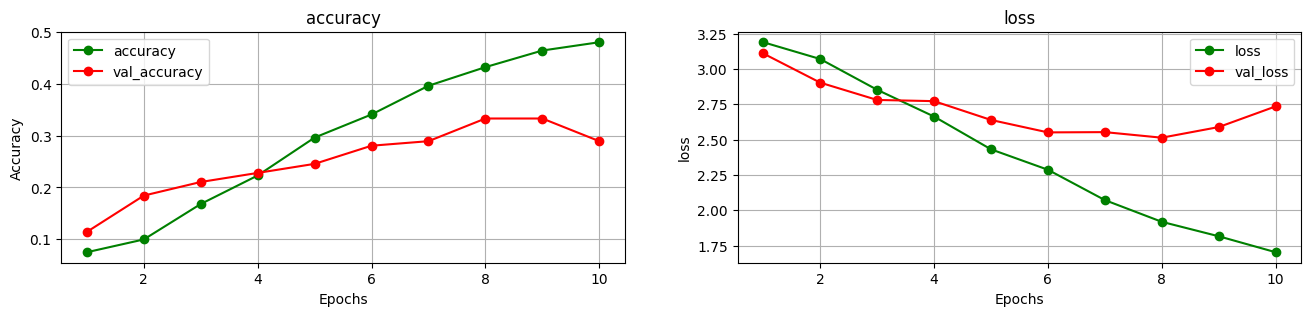

In [81]:
graficar_accuaracy_loss(historial1)

In [83]:

#resolucion de las imagenes en pixceles
num_px=128
#Cambiamos las dimensiones de los conjuntos
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory( data_entrenamiento, target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_prueba = generador_prueba.flow_from_directory(               data_prueba,        target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_validacion = generador_entrenamiento.flow_from_directory(    data_validacion,    target_size=(num_px, num_px),batch_size=32,class_mode='categorical')

model1 = Sequential([
    Convolution2D(16, (3, 3), input_shape=(num_px, num_px, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Convolution2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=26, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model1.summary()
historial1= model1.fit(conjunto_entrenamiento,epochs=10,validation_data=conjunto_prueba)

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 222 images belonging to 26 classes.
Epoch 1/10
72/72 [==============================] - 51s 683ms/step - loss: 3.2291 - accuracy: 0.0747 - val_loss: 3.1075 - val_accuracy: 0.0702
Epoch 2/10
72/72 [==============================] - 47s 649ms/step - loss: 3.0313 - accuracy: 0.1189 - val_loss: 2.9804 - val_accuracy: 0.1667
Epoch 3/10
72/72 [==============================] - 49s 683ms/step - loss: 2.8523 - accuracy: 0.1649 - val_loss: 2.8898 - val_accuracy: 0.2105
Epoch 4/10
72/72 [==============================] - 46s 636ms/step - loss: 2.6327 - accuracy: 0.2348 - val_loss: 2.7671 - val_accuracy: 0.2544
Epoch 5/10
72/72 [==============================] - 55s 757ms/step - loss: 2.4296 - accuracy: 0.2869 - val_loss: 2.6276 - val_accuracy: 0.2544
Epoch 6/10
72/72 [==============================] - 46s 626ms/step - loss: 2.2498 - accuracy: 0.3277 - val_loss: 2.6823 - val_accuracy: 0.2632
Epoch 7/10
72/7

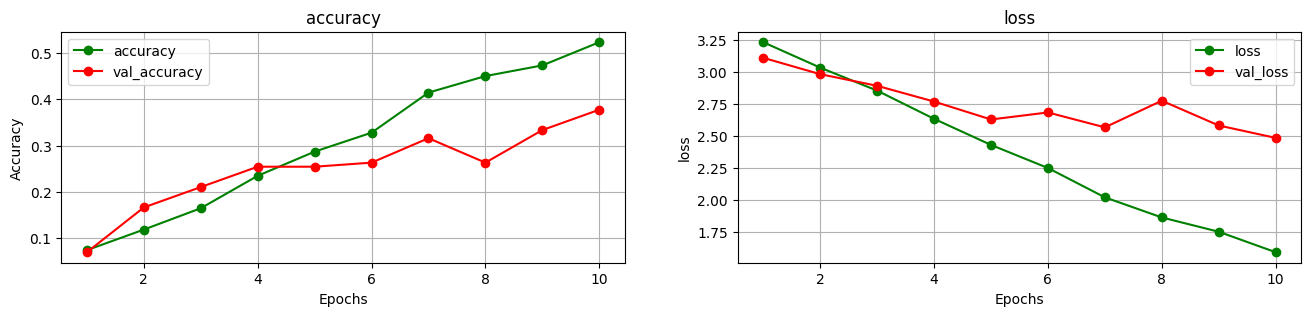

In [84]:
graficar_accuaracy_loss(historial1)

# arquitectura mejor

In [55]:
model2 = Sequential()
model2.add(Convolution2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (num_px,num_px,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 512 , activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units = 26 , activation = 'softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model2.summary()

historial2= model2.fit(conjunto_entrenamiento,epochs=10,validation_data=conjunto_prueba)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 75)        2100      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 32, 32, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 50)       

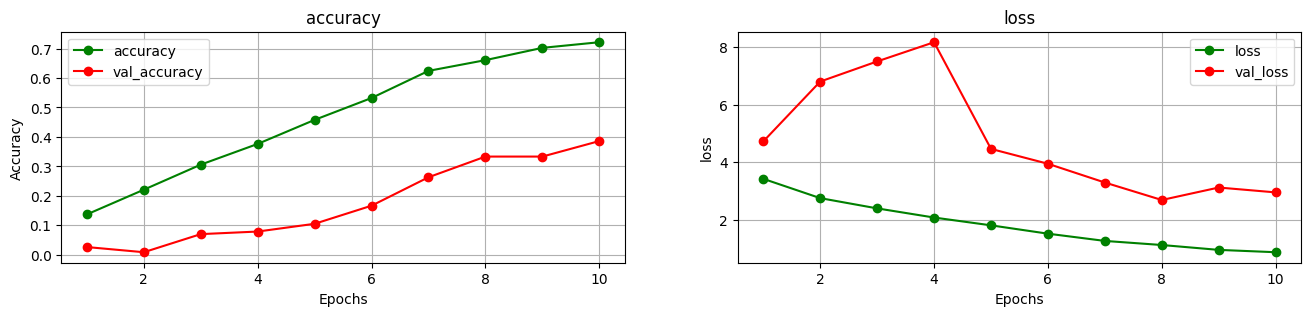

In [56]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(16,3)

ax[0].plot(epoch,historial2.history['accuracy'],'go-',label='accuracy')
ax[0].plot(epoch,historial2.history['val_accuracy'],'ro-',label='val_accuracy')
ax[0].set_title('accuracy')
ax[0].grid()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(epoch,historial2.history['loss'],'go-',label='loss')
ax[1].plot(epoch,historial2.history['val_loss'],'ro-',label='val_loss')
ax[1].set_title('loss')
ax[1].grid()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

In [57]:
#resolucion de las imagenes en pixceles
num_px=64
#Cambiamos las dimensiones de los conjuntos
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory( data_entrenamiento, target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_prueba = generador_prueba.flow_from_directory(               data_prueba,        target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_validacion = generador_entrenamiento.flow_from_directory(    data_validacion,    target_size=(num_px, num_px),batch_size=32,class_mode='categorical')

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 222 images belonging to 26 classes.


In [64]:
model2 = Sequential()
model2.add(Convolution2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (num_px,num_px,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 512 , activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units = 26 , activation = 'softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
historial2= model2.fit(conjunto_entrenamiento,epochs=10,validation_data=conjunto_prueba)

Epoch 1/10
72/72 [==============================] - 22s 267ms/step - loss: 3.3687 - accuracy: 0.0968 - val_loss: 3.6605 - val_accuracy: 0.0789
Epoch 2/10
72/72 [==============================] - 18s 247ms/step - loss: 2.8390 - accuracy: 0.1905 - val_loss: 4.7190 - val_accuracy: 0.0614
Epoch 3/10
72/72 [==============================] - 19s 260ms/step - loss: 2.6166 - accuracy: 0.2418 - val_loss: 5.1125 - val_accuracy: 0.0351
Epoch 4/10
72/72 [==============================] - 18s 254ms/step - loss: 2.4053 - accuracy: 0.2943 - val_loss: 4.7812 - val_accuracy: 0.0789
Epoch 5/10
72/72 [==============================] - 19s 263ms/step - loss: 2.2182 - accuracy: 0.3372 - val_loss: 3.7296 - val_accuracy: 0.0439
Epoch 6/10
72/72 [==============================] - 19s 260ms/step - loss: 1.9897 - accuracy: 0.4049 - val_loss: 2.9527 - val_accuracy: 0.1754
Epoch 7/10
72/72 [==============================] - 18s 256ms/step - loss: 1.8028 - accuracy: 0.4596 - val_loss: 2.5847 - val_accuracy: 0.2719

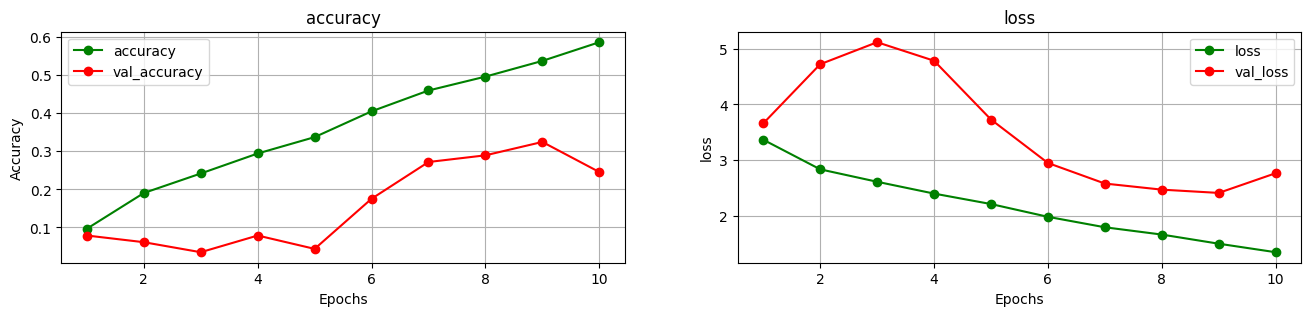

In [65]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(16,3)

ax[0].plot(epoch,historial2.history['accuracy'],'go-',label='accuracy')
ax[0].plot(epoch,historial2.history['val_accuracy'],'ro-',label='val_accuracy')
ax[0].set_title('accuracy')
ax[0].grid()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(epoch,historial2.history['loss'],'go-',label='loss')
ax[1].plot(epoch,historial2.history['val_loss'],'ro-',label='val_loss')
ax[1].set_title('loss')
ax[1].grid()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

In [67]:
#resolucion de las imagenes en pixceles
num_px=64
#Cambiamos las dimensiones de los conjuntos
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory( data_entrenamiento, target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_prueba = generador_prueba.flow_from_directory(               data_prueba,        target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_validacion = generador_entrenamiento.flow_from_directory(    data_validacion,    target_size=(num_px, num_px),batch_size=32,class_mode='categorical')

#modelo
model2 = Sequential()
model2.add(Convolution2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (num_px,num_px,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 512 , activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units = 26 , activation = 'softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
historial2= model2.fit(conjunto_entrenamiento,epochs=30,validation_data=conjunto_prueba)

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 222 images belonging to 26 classes.
Epoch 1/30
72/72 [==============================] - 64s 836ms/step - loss: 3.5339 - accuracy: 0.0985 - val_loss: 4.6735 - val_accuracy: 0.0526
Epoch 2/30
72/72 [==============================] - 59s 808ms/step - loss: 2.7868 - accuracy: 0.2070 - val_loss: 6.8817 - val_accuracy: 0.0702
Epoch 3/30
72/72 [==============================] - 62s 853ms/step - loss: 2.5379 - accuracy: 0.2773 - val_loss: 6.8303 - val_accuracy: 0.0263
Epoch 4/30
72/72 [==============================] - 59s 817ms/step - loss: 2.2652 - accuracy: 0.3424 - val_loss: 6.0959 - val_accuracy: 0.0702
Epoch 5/30
72/72 [==============================] - 61s 843ms/step - loss: 1.9743 - accuracy: 0.4245 - val_loss: 4.8263 - val_accuracy: 0.0965
Epoch 6/30
72/72 [==============================] - 63s 865ms/step - loss: 1.6622 - accuracy: 0.5091 - val_loss: 4.8906 - val_accuracy: 0.0877
Epoch 7/30
72/7

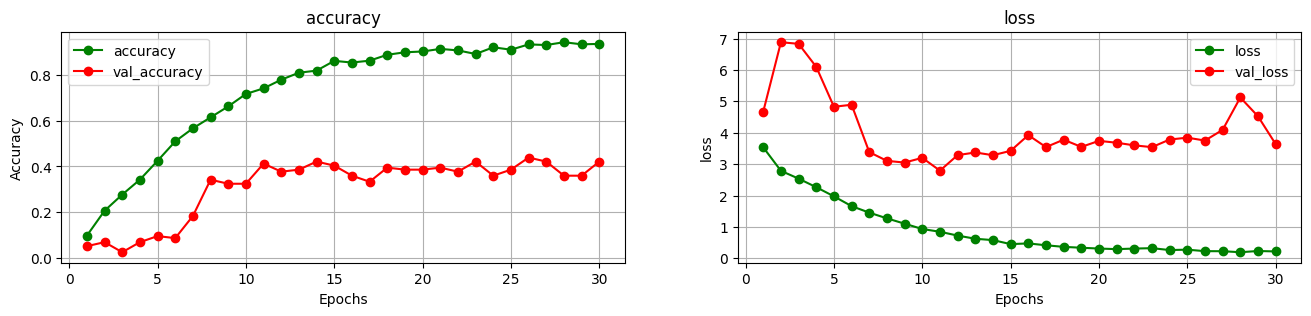

In [69]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(16,3)
epoch=np.linspace(1,30,30)
ax[0].plot(epoch,historial2.history['accuracy'],'go-',label='accuracy')
ax[0].plot(epoch,historial2.history['val_accuracy'],'ro-',label='val_accuracy')
ax[0].set_title('accuracy')
ax[0].grid()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(epoch,historial2.history['loss'],'go-',label='loss')
ax[1].plot(epoch,historial2.history['val_loss'],'ro-',label='val_loss')
ax[1].set_title('loss')
ax[1].grid()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

In [70]:
#resolucion de las imagenes en pixceles
num_px=64
#Cambiamos las dimensiones de los conjuntos
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory( data_entrenamiento, target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_prueba = generador_prueba.flow_from_directory(               data_prueba,        target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_validacion = generador_entrenamiento.flow_from_directory(    data_validacion,    target_size=(num_px, num_px),batch_size=32,class_mode='categorical')

#modelo
model2 = Sequential()
model2.add(Convolution2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (num_px,num_px,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 512 , activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units = 26 , activation = 'softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
historial2= model2.fit(conjunto_entrenamiento,epochs=30,validation_data=conjunto_validacion)

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 222 images belonging to 26 classes.
Epoch 1/30
72/72 [==============================] - 215s 2s/step - loss: 3.5101 - accuracy: 0.1224 - val_loss: 4.7715 - val_accuracy: 0.0766
Epoch 2/30
72/72 [==============================] - 59s 823ms/step - loss: 2.7359 - accuracy: 0.2205 - val_loss: 7.1475 - val_accuracy: 0.0721
Epoch 3/30
72/72 [==============================] - 58s 805ms/step - loss: 2.4657 - accuracy: 0.2886 - val_loss: 10.2471 - val_accuracy: 0.0315
Epoch 4/30
72/72 [==============================] - 66s 912ms/step - loss: 2.1788 - accuracy: 0.3459 - val_loss: 8.6178 - val_accuracy: 0.0315
Epoch 5/30
72/72 [==============================] - 57s 790ms/step - loss: 1.9218 - accuracy: 0.4332 - val_loss: 7.9450 - val_accuracy: 0.0450
Epoch 6/30
72/72 [==============================] - 57s 794ms/step - loss: 1.6269 - accuracy: 0.5143 - val_loss: 5.7562 - val_accuracy: 0.1081
Epoch 7/30
72/72

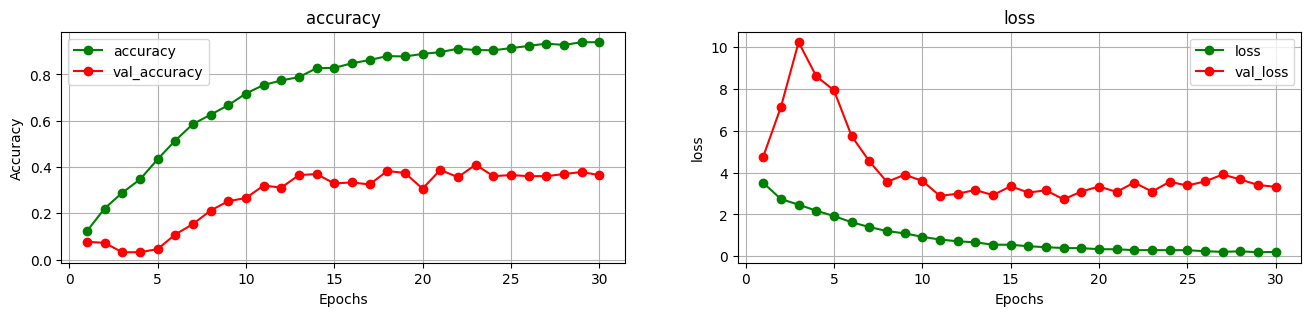

In [71]:
graficar_accuaracy_loss(historial2)